# 1D Clustering - Kernel Density Estimation

This notebook demos examples how to implment **Kernel Density Estimation** (KDE) to cluster 1D data. We briefly follow the method mentioned in the stackoverflow blog: [[Stackoverflow] How would one use Kernel Density Estimation as a 1D clustering method in scikit learn?](https://stackoverflow.com/questions/35094454/how-would-one-use-kernel-density-estimation-as-a-1d-clustering-method-in-scikit).



## Reference

* [[Stackoverflow] How would one use Kernel Density Estimation as a 1D clustering method in scikit learn?](https://stackoverflow.com/questions/35094454/how-would-one-use-kernel-density-estimation-as-a-1d-clustering-method-in-scikit)
* [Density estimation](https://scikit-learn.org/stable/modules/density.html)
* [Simple 1D Kernel Density Estimation](https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html)


In [1]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

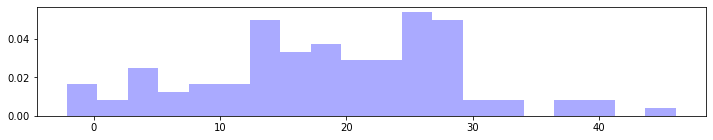

In [2]:
mu, sigma = 20, 10 # mean and standard deviation
data1 = np.random.normal(mu, sigma, 100)

plt.figure(figsize=(12, 2))
plt.hist(data1, bins=20, fc="#AAAAFF", density=True)
plt.show()

## Fitting Histogram

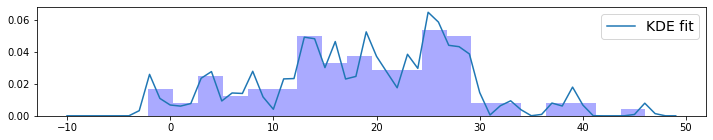

In [4]:
test = np.array(range(-10, 50))

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data1.reshape(-1,1))
log_density = kde.score_samples(test.reshape(-1,1))

plt.figure(figsize=(12, 2))
plt.plot(test, np.exp(log_density), label="KDE fit")
plt.hist(data1, bins=20, fc="#AAAAFF", density=True)
plt.legend(loc="best", fontsize=14)
plt.show()

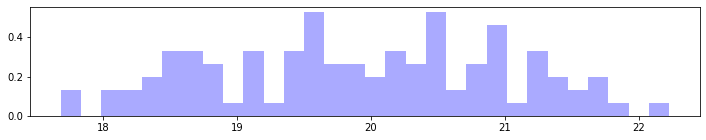

In [6]:
mu, sigma = 20, 1 # mean and standard deviation
data2 = np.random.normal(mu, sigma, 100)

plt.figure(figsize=(12, 2))
plt.hist(data2, bins=30, fc="#AAAAFF", density=True)
plt.show()

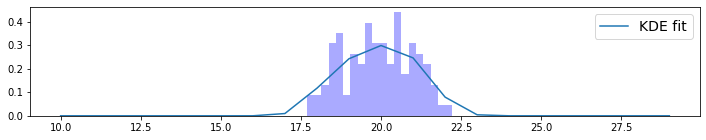

In [7]:
test = np.array(range(10, 30))

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data2.reshape(-1,1))
log_density = kde.score_samples(test.reshape(-1,1))

plt.figure(figsize=(12, 2))
plt.plot(test, np.exp(log_density), label="KDE fit")
plt.hist(data2, bins=20, fc="#AAAAFF", density=True)
plt.legend(loc="best", fontsize=14)
plt.show()

## KDE implementation to 1D Clustering

Assume, we have a histogram from 3 Gaussian distributions:

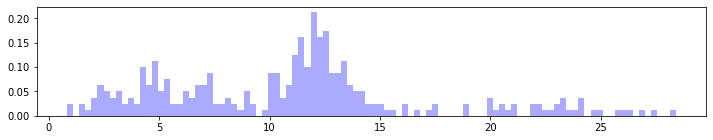

In [23]:
data3 = np.array(list(np.random.normal(5, 2, 100)) + 
                 list(np.random.normal(12, 1.5, 150)) +
                 list(np.random.normal(21, 4, 40)))

plt.figure(figsize=(12, 2))
plt.hist(data3, bins=100, fc="#AAAAFF", density=True)
plt.show()

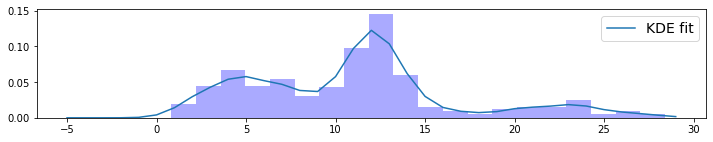

In [24]:
test = np.array(range(-5, 30))

kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(data3.reshape(-1,1))
log_density = kde.score_samples(test.reshape(-1,1))

plt.figure(figsize=(12, 2))
plt.plot(test, np.exp(log_density), label="KDE fit")
plt.hist(data3, bins=20, fc="#AAAAFF", density=True)
plt.legend(loc="best", fontsize=14)
plt.show()

In [25]:
from scipy.signal import argrelextrema

s = np.linspace(np.min(data3)-1, np.max(data3)+1)
e = kde.score_samples(s.reshape(-1,1))
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]

print("Minima:", s[mi])
print("Maxima:", s[ma])

Minima: [ 8.87841832 17.93193286]
Maxima: [ 4.65344487 11.8962565  23.36404158]


In [26]:
group = []
for i in range(len(s[mi])+1):
    if i == 0:
        group.append(data3[data3 < s[mi[0]]])
    elif i == len(s[mi]):
        group.append(data3[data3 >= s[mi[-1]]])
    else:
        group.append(data3[( data3 < s[mi[i]]) & (data3 >= s[mi[i-1]])])

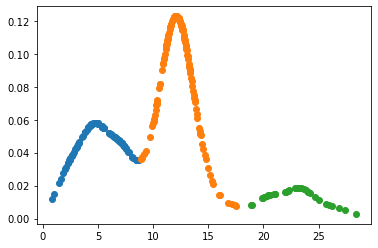

In [27]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in range(len(group)):
    x = group[i]
    plt.scatter(x, np.exp(kde.score_samples(x.reshape(-1,1))), c=colors[i])
plt.show()

## Scenario: Clustering 3 normal, 1 abnormal Distirbutions

Here I assume there is an abnormal Gaussian distribution with higher variation, whose values are likely higher than other three normal Gaussian distributions. The abnormal distribution plays a role like outlier events.

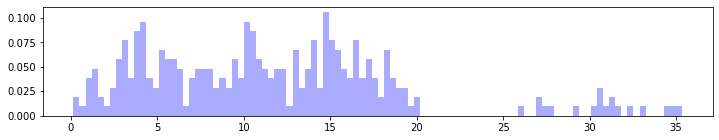

In [38]:
data4 = np.array(list(np.random.normal(4, 2, 90)) +
                 list(np.random.normal(10, 2, 85)) +
                 list(np.random.normal(16, 2, 100)) + 
                 list(np.random.normal(30, 4, 20)))

plt.figure(figsize=(12, 2))
plt.hist(data4, bins=100, fc="#AAAAFF", density=True)
plt.show()

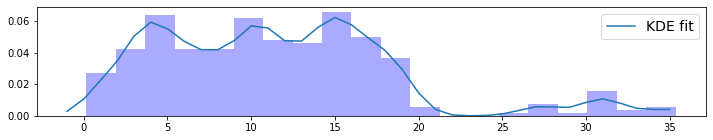

In [39]:
test = np.array(range(int(np.min(data4))-1, int(np.max(data4))+1))

kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(data4.reshape(-1,1))
log_density = kde.score_samples(test.reshape(-1,1))

plt.figure(figsize=(12, 2))
plt.plot(test, np.exp(log_density), label="KDE fit")
plt.hist(data4, bins=20, fc="#AAAAFF", density=True)
plt.legend(loc="best", fontsize=14)
plt.show()

In [40]:
s = np.linspace(np.min(data4)-1, np.max(data4)+1)
e = kde.score_samples(s.reshape(-1,1))
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]

print("Minima:", s[mi])
print("Maxima:", s[ma])

Minima: [ 7.49569915 12.81109793 23.44189549 28.75729426 34.07269304]
Maxima: [ 4.45832842 10.53306988 15.08912598 27.2386089  31.03532231 34.83203572]


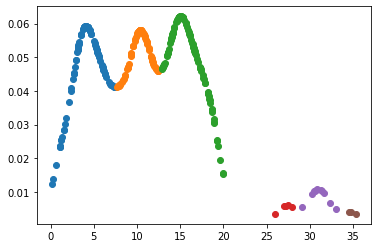

In [41]:
group = []
for i in range(len(s[mi])+1):
    if i == 0:
        group.append(data4[data4 < s[mi[0]]])
    elif i == len(s[mi]):
        group.append(data4[data4 >= s[mi[-1]]])
    else:
        group.append(data4[(data4 < s[mi[i]]) & (data4 >= s[mi[i-1]])])

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in range(len(group)):
    x = group[i]
    plt.scatter(x, np.exp(kde.score_samples(x.reshape(-1,1))), c=colors[i])
plt.show()